In [72]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [268]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Recibimos 3 parametros en el np.arange por que 1 es donde empieza, 2 donde termina y los saltos que dara
# Aqui tenemos que Tiempo y Calidad empiezan igual, pero se sube con la cantidad para darle espaciado la igual que con las recomendaciones

# Esto nos sirve para las graficas, tendremos una visualizacion mas clara de estas
# Entradas
Tiempo = ctrl.Antecedent(np.arange(0, 11, 1), 'Tiempo')
CalidadComida = ctrl.Antecedent(np.arange(0, 11, 1), 'CalidadComida')
Cantidad = ctrl.Antecedent(np.arange(0, 40, 1), 'Cantidad')
#Se declara junto con las entradas, pero esta sera nuestra salida
Recomendacion = ctrl.Consequent(np.arange(0, 85, 1), 'Recomendacion')

In [269]:
# Tiempos
# Donde determinaremos los datos del universo en el que se encuentran
# De igual forma daremos el nombre a los datos que haremos referencia dentro de las reglas, sin esto, no podremos decidir que tipo queremos de cada entrada
Tiempo['Rapido']= fuzz.gaussmf(Tiempo.universe, 0, 1.5)
Tiempo['Medio'] = fuzz.gaussmf(Tiempo.universe, 5,1.15)
Tiempo['Lento'] = fuzz.gaussmf(Tiempo.universe, 10, 1.5)
Tiempo['Normal'] = fuzz.gaussmf(Tiempo.universe, 15, 1.5)


In [270]:
# Calidad de la comida
# Donde determinaremos los datos del universo en el que se encuentran
# De igual forma daremos el nombre a los datos que haremos referencia dentro de las reglas, sin esto, no podremos decidir que tipo queremos de cada entrada
CalidadComida['Exquisita'] = fuzz.gaussmf(CalidadComida.universe, 0, 1.5)
CalidadComida['Buena'] = fuzz.gaussmf(CalidadComida.universe, 5,1.15)
CalidadComida['Media'] = fuzz.gaussmf(CalidadComida.universe, 10,1.15)
CalidadComida['Normal'] = fuzz.gaussmf(CalidadComida.universe, 15,1.15)

In [271]:
# Cantidad de comida
# Donde determinaremos los datos del universo en el que se encuentran
# De igual forma daremos el nombre a los datos que haremos referencia dentro de las reglas, sin esto, no podremos decidir que tipo queremos de cada entrada
Cantidad['Mochoso'] = fuzz.trapmf(Cantidad.universe, [0, 5, 10,15])
Cantidad['Gurmet'] = fuzz.trapmf(Cantidad.universe, [15, 20, 25,30])
Cantidad['Normal'] = fuzz.trapmf(Cantidad.universe, [25, 30,35,40])

In [272]:
# Recomendaciones
# Donde determinaremos los datos del universo en el que se encuentran
# De igual forma daremos el nombre a los datos que haremos referencia dentro de las reglas, sin esto, no podremos decidir que tipo queremos de cada entrada
Recomendacion['Comida Rapida'] = fuzz.trimf(Recomendacion.universe, [0, 5, 10])
Recomendacion['Comida Mexicana'] = fuzz.trimf(Recomendacion.universe, [10, 15, 20])
Recomendacion['Comida Libanesa'] = fuzz.trimf(Recomendacion.universe, [20, 25, 30])
Recomendacion['Comida Japonesa'] = fuzz.trimf(Recomendacion.universe, [30, 35, 40])
Recomendacion['Comida Coreana'] = fuzz.trimf(Recomendacion.universe, [40, 45, 50])
Recomendacion['Comida Italiana'] = fuzz.trimf(Recomendacion.universe, [50, 55, 60])
Recomendacion['Comida Francesa'] = fuzz.trimf(Recomendacion.universe, [50, 55, 60])
Recomendacion['Comida Peruana'] = fuzz.trimf(Recomendacion.universe, [60, 65, 70])
Recomendacion['Comida China'] = fuzz.trimf(Recomendacion.universe, [70, 75, 80])


In [ ]:
# Vistas de las graficas a usar
Tiempo.view()
CalidadComida.view()
Cantidad.view()
Recomendacion.view()

In [274]:
# Declaracion de reglas que se van a utilizar dentro del programa
# Se pueden agregar mas reglas para las demas opciones, por tiempo y simplicidad nomas agregue 2 de cada tiempo y varie las demas entradas
Regla1 = ctrl.Rule(Tiempo['Rapido'] & CalidadComida['Normal'] | Cantidad['Mochoso'] , Recomendacion['Comida Rapida'])
Regla2 = ctrl.Rule(Tiempo['Rapido']  & CalidadComida['Exquisita'] | Cantidad['Gurmet'] , Recomendacion['Comida Japonesa'])
Regla3 = ctrl.Rule(Tiempo['Normal'] & CalidadComida['Media'] |Cantidad['Normal'] , Recomendacion['Comida Libanesa'])
Regla4 = ctrl.Rule(Tiempo['Normal'] & CalidadComida['Buena'] |Cantidad['Mochoso'] , Recomendacion['Comida Coreana'])
Regla5 = ctrl.Rule(Tiempo['Lento'] & CalidadComida['Buena'] |Cantidad['Gurmet'] , Recomendacion['Comida Francesa'])
Regla6 = ctrl.Rule(Tiempo['Lento'] & CalidadComida['Exquisita'] |Cantidad['Normal'] , Recomendacion['Comida Italiana'])
Regla7 = ctrl.Rule(Tiempo['Medio'] & CalidadComida['Media'] |Cantidad['Normal'] , Recomendacion['Comida Peruana'])
Regla8 = ctrl.Rule(Tiempo['Medio'] & CalidadComida['Exquisita'] |Cantidad['Mochoso'] , Recomendacion['Comida China'])
Regla8 = ctrl.Rule(Tiempo['Medio'] & CalidadComida['Exquisita'] |Cantidad['Normal'] , Recomendacion['Comida Mexicana'])


In [275]:
# Este es el control que implementara las reglas al sistema, las que controlaran o delimitaran al sistema difuso
recomendation_ctrl = ctrl.ControlSystem([Regla1, Regla2, Regla3, Regla4, Regla5,Regla6, Regla7, Regla8])
# Aqui se hace uso de las reglas junto con el control previamente creado
recomendation = ctrl.ControlSystemSimulation(recomendation_ctrl)
# Se podria hacer de la siguiente manera, si es que no quieres utilizar una variable para las reglas
# -
# --
# ---> recomendation = ctrl.ControlSystemSimulation([Regla1, Regla2, Regla3, Regla4, Regla5,Regla6, Regla7, Regla8])

54.908115522652274


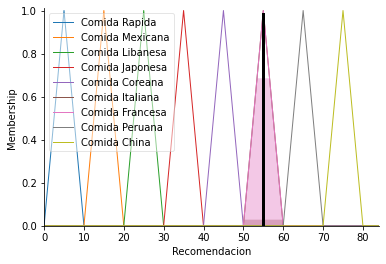

In [276]:
# Damos las entradas, con sus respectivas 
recomendation.input['Tiempo'] = 10
recomendation.input['CalidadComida'] = 4
recomendation.input['Cantidad'] = 15
recomendation.compute()
print(recomendation.output['Recomendacion'])
Recomendacion.view(sim=recomendation)